/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


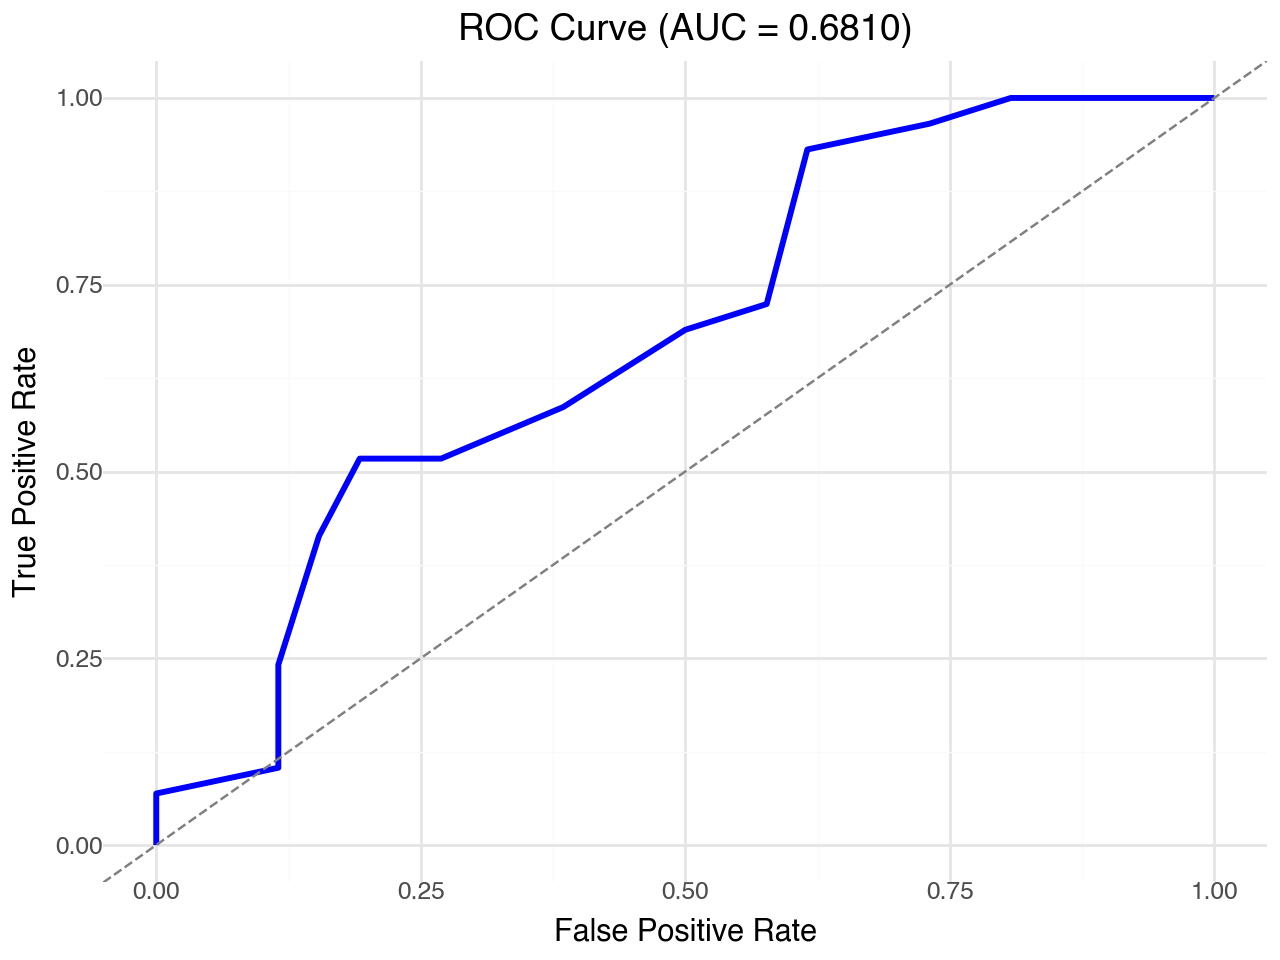

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


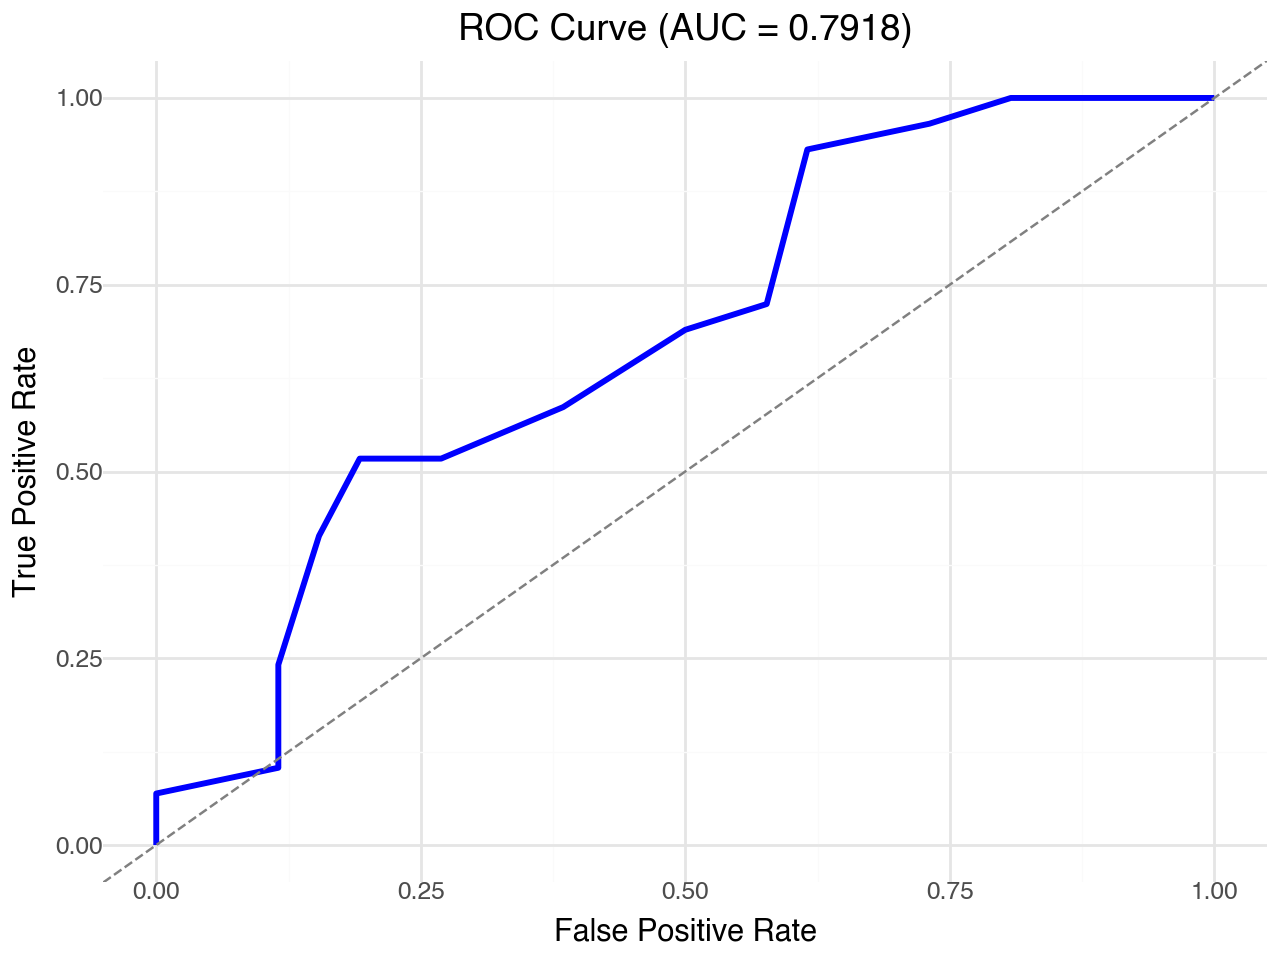

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, auc
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_line, geom_abline, labs, theme_minimal, scale_color_manual
from sklearn.tree import DecisionTreeClassifier, plot_tree

ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1").dropna()



### Part One 

##### KNN

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


Best parameters: {'n_neighbors': 14}
Best cross-validated ROC AUC: 0.8692
Test ROC AUC: 0.6810
Confusion Matrix:
[[16 10]
 [12 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.62      0.59        26
           1       0.63      0.59      0.61        29

    accuracy                           0.60        55
   macro avg       0.60      0.60      0.60        55
weighted avg       0.60      0.60      0.60        55


Interpretation:
The KNN model used 14 neighbors,
Best parameters: {'n_neighbors': 14}
Best cross-validated ROC AUC: 0.8692
Test ROC AUC: 0.6810
Confusion Matrix:
[[16 10]
 [12 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.62      0.59        26
           1       0.63      0.59      0.61        29

    accuracy                           0.60        55
   macro avg       0.60      0.60      0.60        55
weighted avg       0.60      0.60      0.

<positron-console-cell-13>:68: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


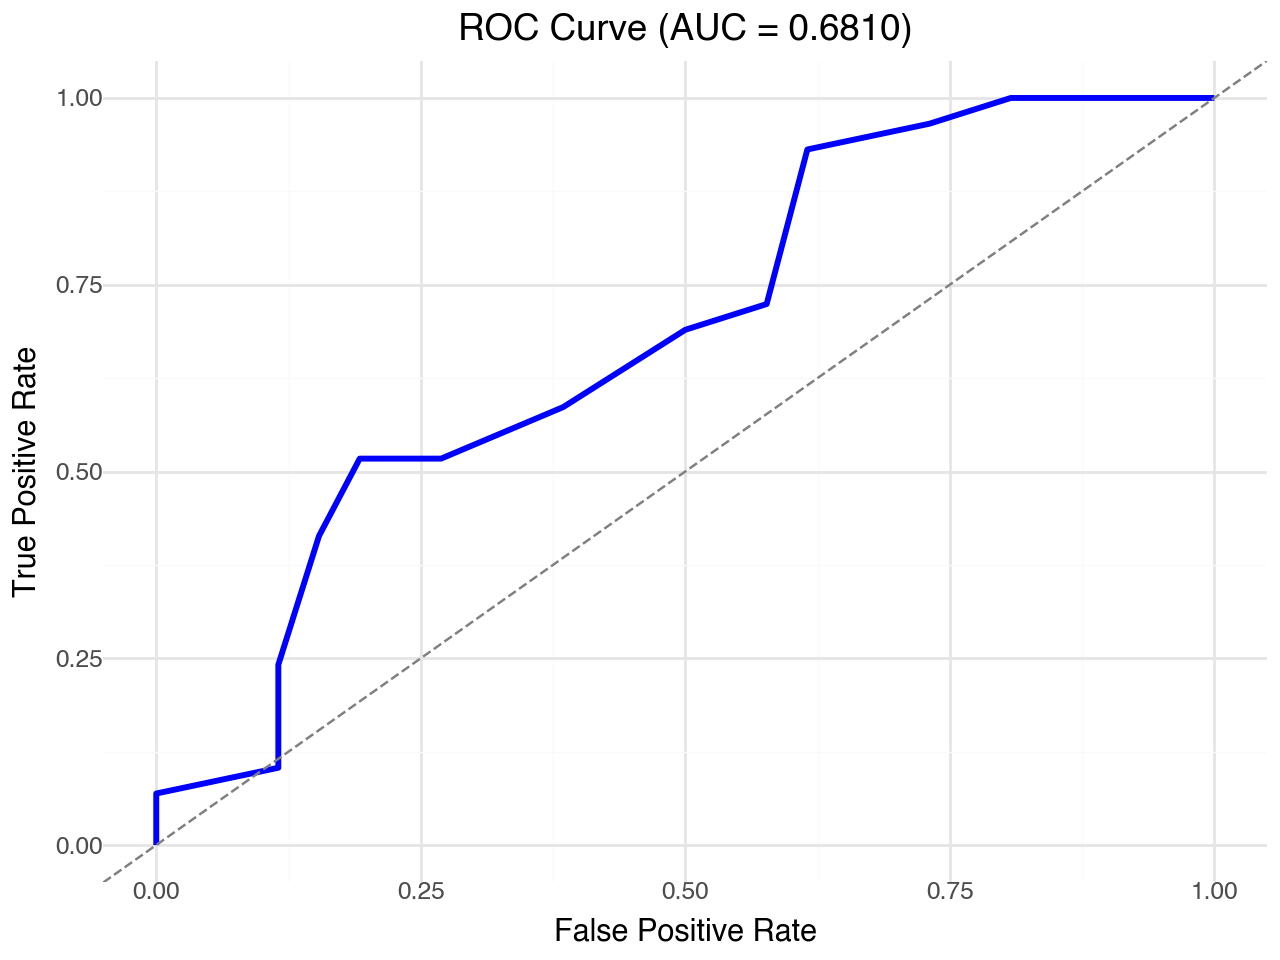

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


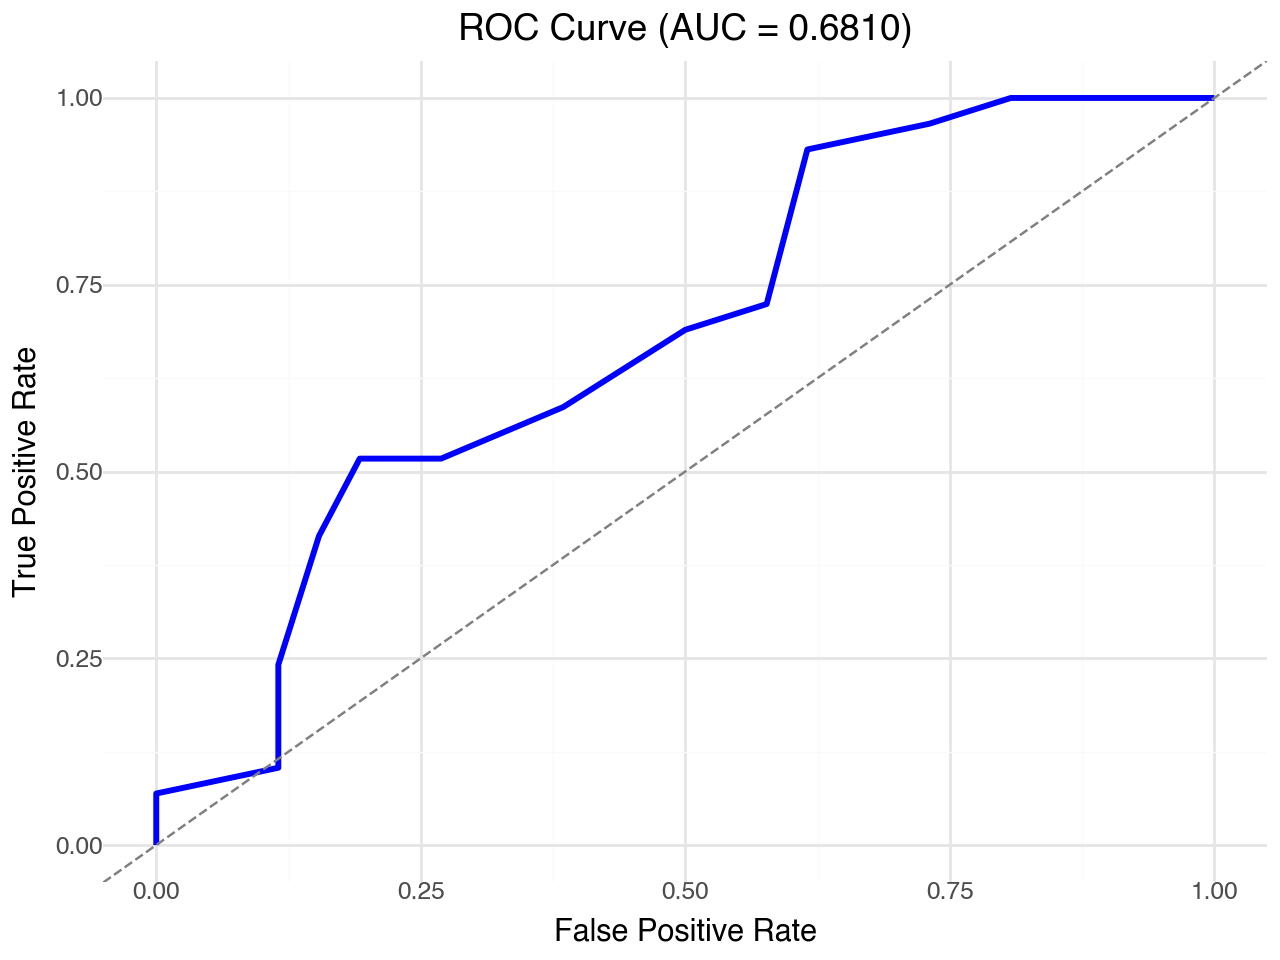

In [13]:
# Step 1: Preprocessing
X = ha.drop(columns=['output'])
y = ha['output']

# Standardizing the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Model Selection - Find the best KNN model based on ROC AUC
param_grid = {'n_neighbors': range(1, 31)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, scoring='roc_auc', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated ROC AUC: {grid_search.best_score_:.4f}")

# Step 3: Fit the final model
best_knn.fit(X_train, y_train)

# Step 4: Evaluate the model on the test set
y_pred = best_knn.predict(X_test)
y_pred_prob = best_knn.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Test ROC AUC: {test_roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Interpretation
print("\nInterpretation:")
print(f"The KNN model used {grid_search.best_params_['n_neighbors']} neighbors,")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Create a DataFrame for plotting
roc_df = pd.DataFrame({
    'FPR': fpr,
    'TPR': tpr
})

# Plot the ROC Curve using plotnine
roc_plot = (
    ggplot(roc_df, aes(x='FPR', y='TPR')) +
    geom_line(color='blue', size=1.2) +
    geom_abline(intercept=0, slope=1, linetype='dashed', color='gray') +  # Diagonal reference line
    labs(
        title=f"ROC Curve (AUC = {roc_auc:.4f})",
        x="False Positive Rate",
        y="True Positive Rate"
    ) +
    theme_minimal()
)

print(roc_plot)

#### Logistic Regression

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validated ROC AUC: 0.8641
Test ROC AUC: 0.7918
Confusion Matrix:
[[16 10]
 [ 4 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        26
           1       0.71      0.86      0.78        29

    accuracy                           0.75        55
   macro avg       0.76      0.74      0.74        55
weighted avg       0.75      0.75      0.74        55


Interpretation:
The logistic regression model used C=0.01, with penalty='l2'.
Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validated ROC AUC: 0.8641
Test ROC AUC: 0.7918
Confusion Matrix:
[[16 10]
 [ 4 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        26
           1       0.71      0.86      0.78        29

    accuracy                           0.75        55
   macro a

<positron-console-cell-16>:55: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


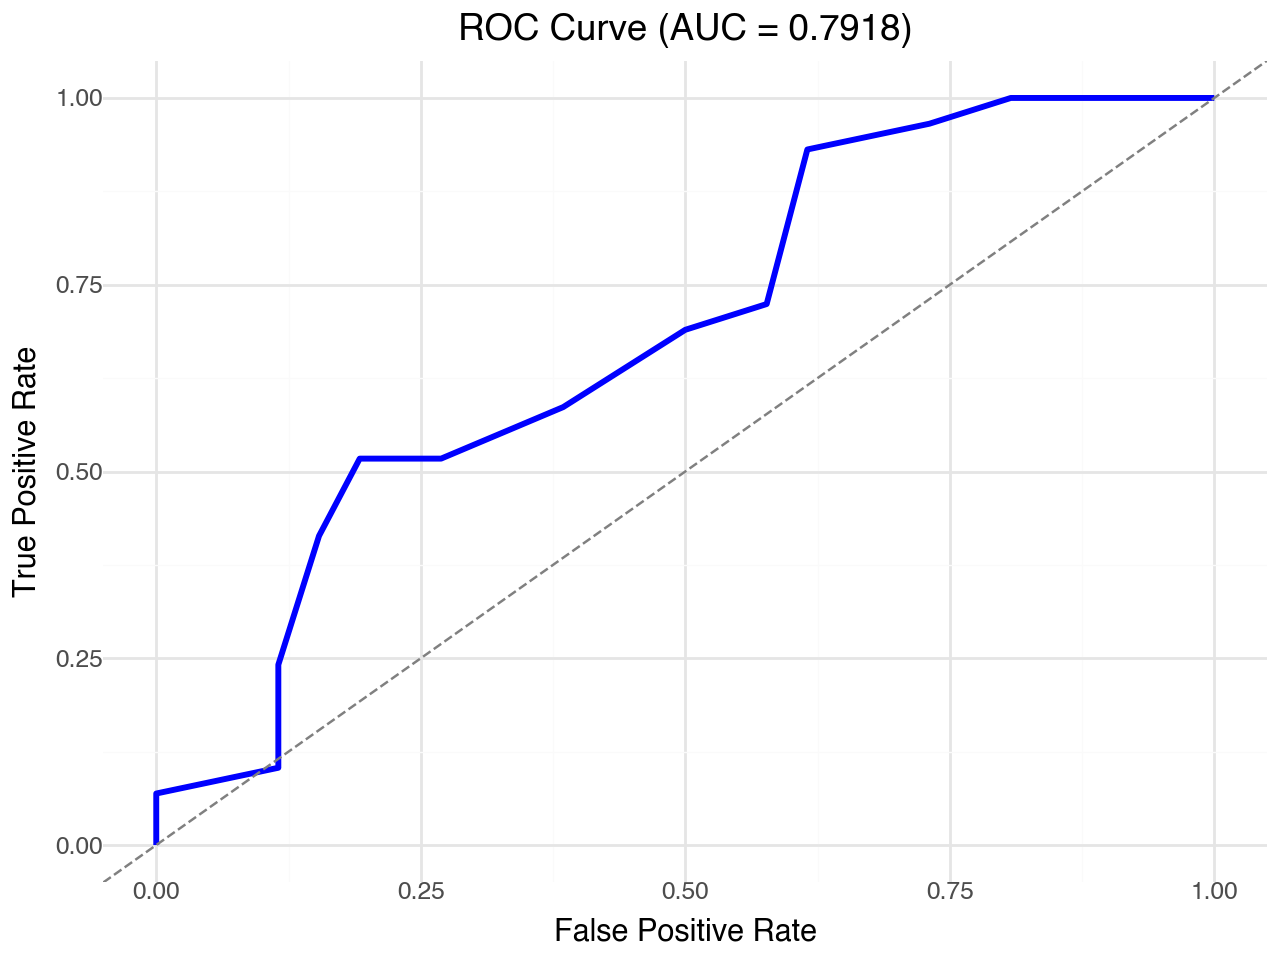

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


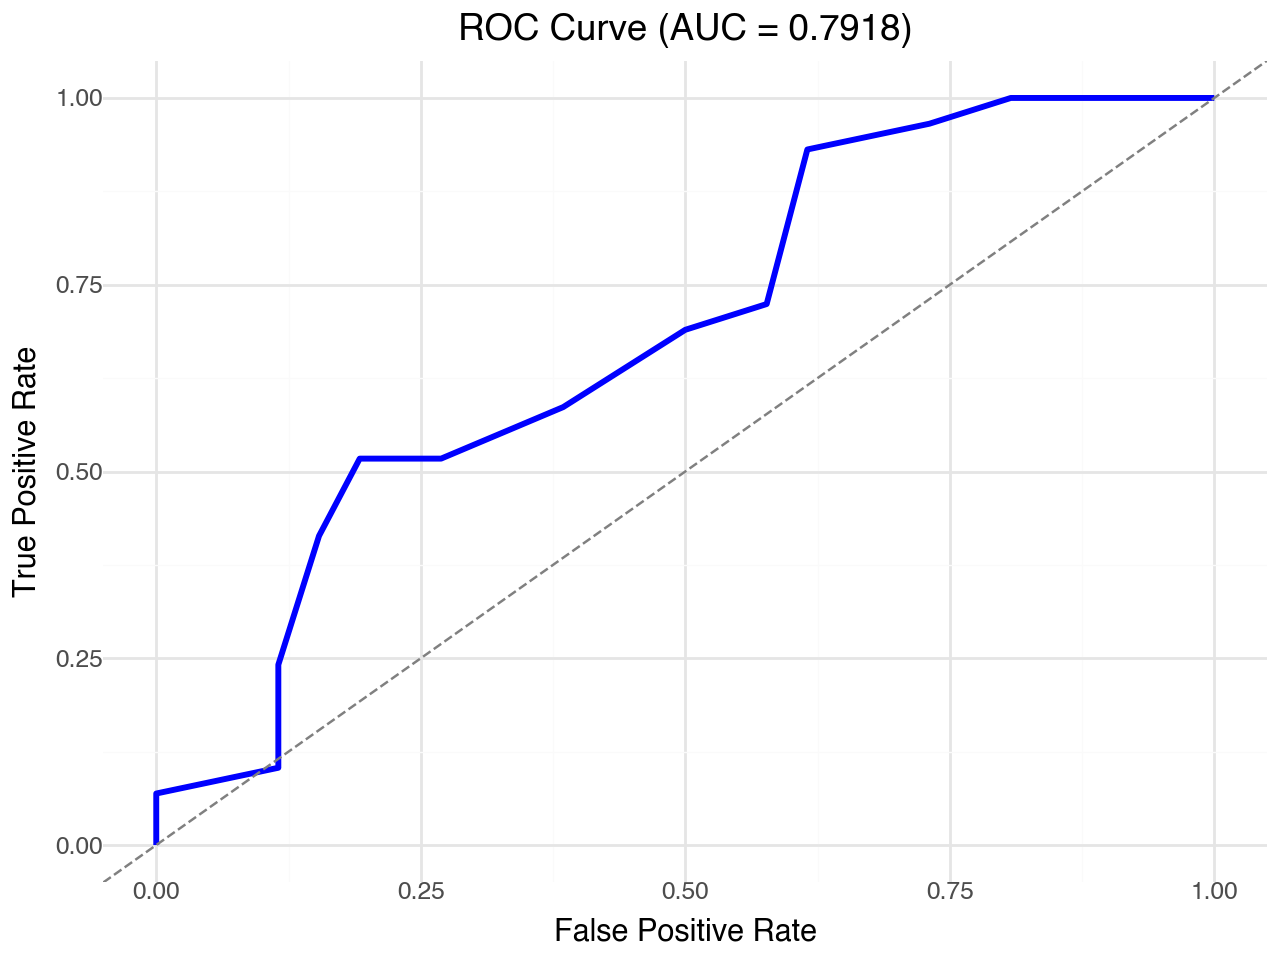

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


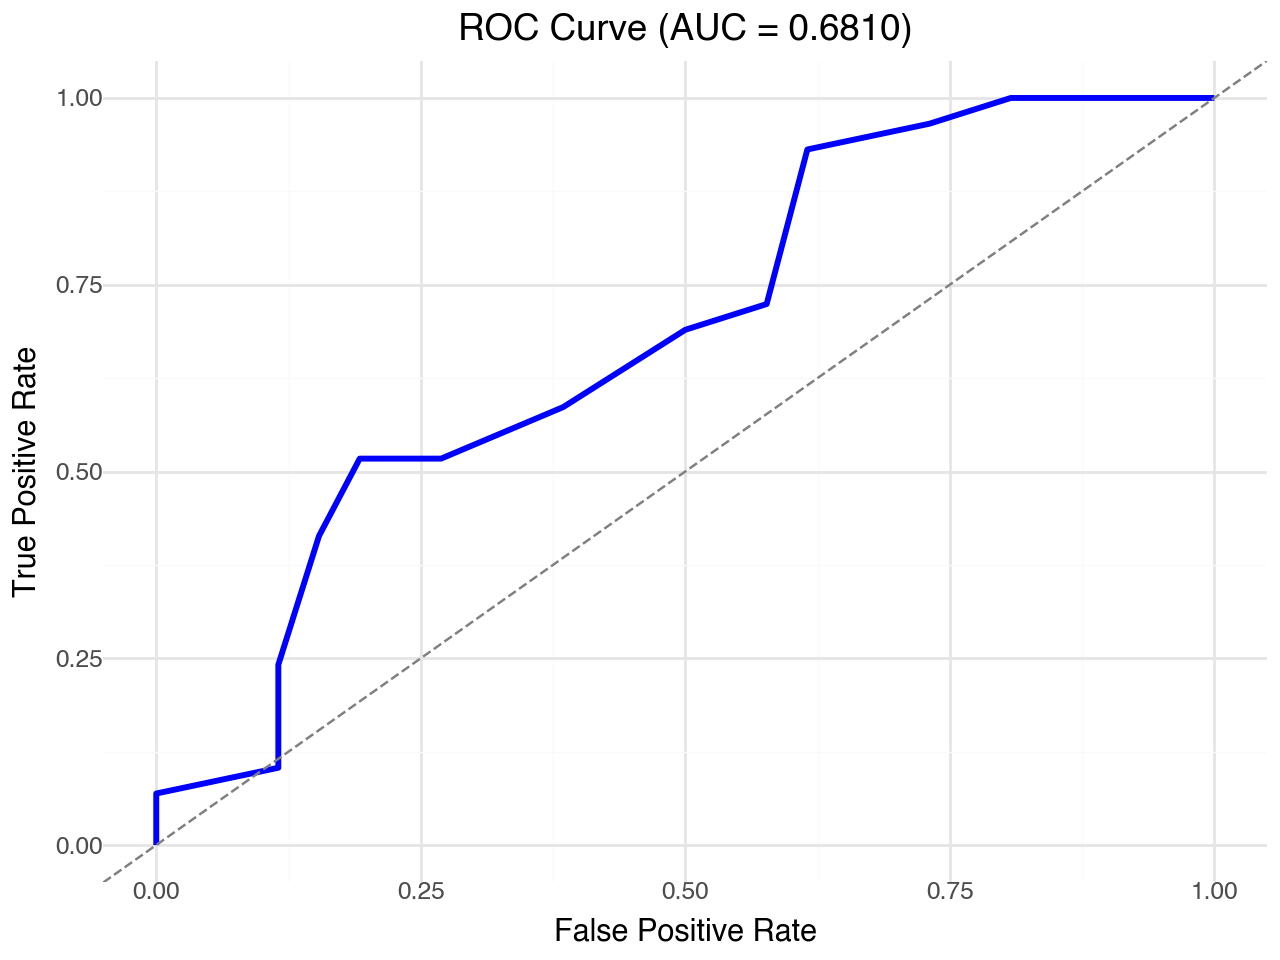

In [16]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs']}
logreg = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(logreg, param_grid, scoring='roc_auc', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

best_logreg = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated ROC AUC: {grid_search.best_score_:.4f}")

# Step 3: Fit the final model
best_logreg.fit(X_train, y_train)

# Step 4: Evaluate the model on the test set
y_pred = best_logreg.predict(X_test)
y_pred_prob = best_logreg.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Test ROC AUC: {test_roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Interpretation
print("\nInterpretation:")
print(f"The logistic regression model used C={grid_search.best_params_['C']}, with penalty='{grid_search.best_params_['penalty']}'.")

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Create a DataFrame for plotting
roc_df2 = pd.DataFrame({
    'FPR': fpr,
    'TPR': tpr
})

roc_plot2 = (
    ggplot(roc_df, aes(x='FPR', y='TPR')) +
    geom_line(color='blue', size=1.2) +
    geom_abline(intercept=0, slope=1, linetype='dashed', color='gray') +  # Diagonal reference line
    labs(
        title=f"ROC Curve (AUC = {roc_auc:.4f})",
        x="False Positive Rate",
        y="True Positive Rate"
    ) +
    theme_minimal()
)

print(roc_plot2)

#### Decision Tree

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validated ROC AUC: 0.7966
Test ROC AUC: 0.7221
Confusion Matrix:
[[20  6]
 [11 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.77      0.70        26
           1       0.75      0.62      0.68        29

    accuracy                           0.69        55
   macro avg       0.70      0.69      0.69        55
weighted avg       0.70      0.69      0.69        55


Interpretation:
The decision tree model used max_depth=None, min_samples_split=10, and min_samples_leaf=1.
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validated ROC AUC: 0.7966
Test ROC AUC: 0.7221
Confusion Matrix:
[[20  6]
 [11 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.77      0.70        26
           1       0.75      0.62      0.68       

<positron-console-cell-19>:63: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


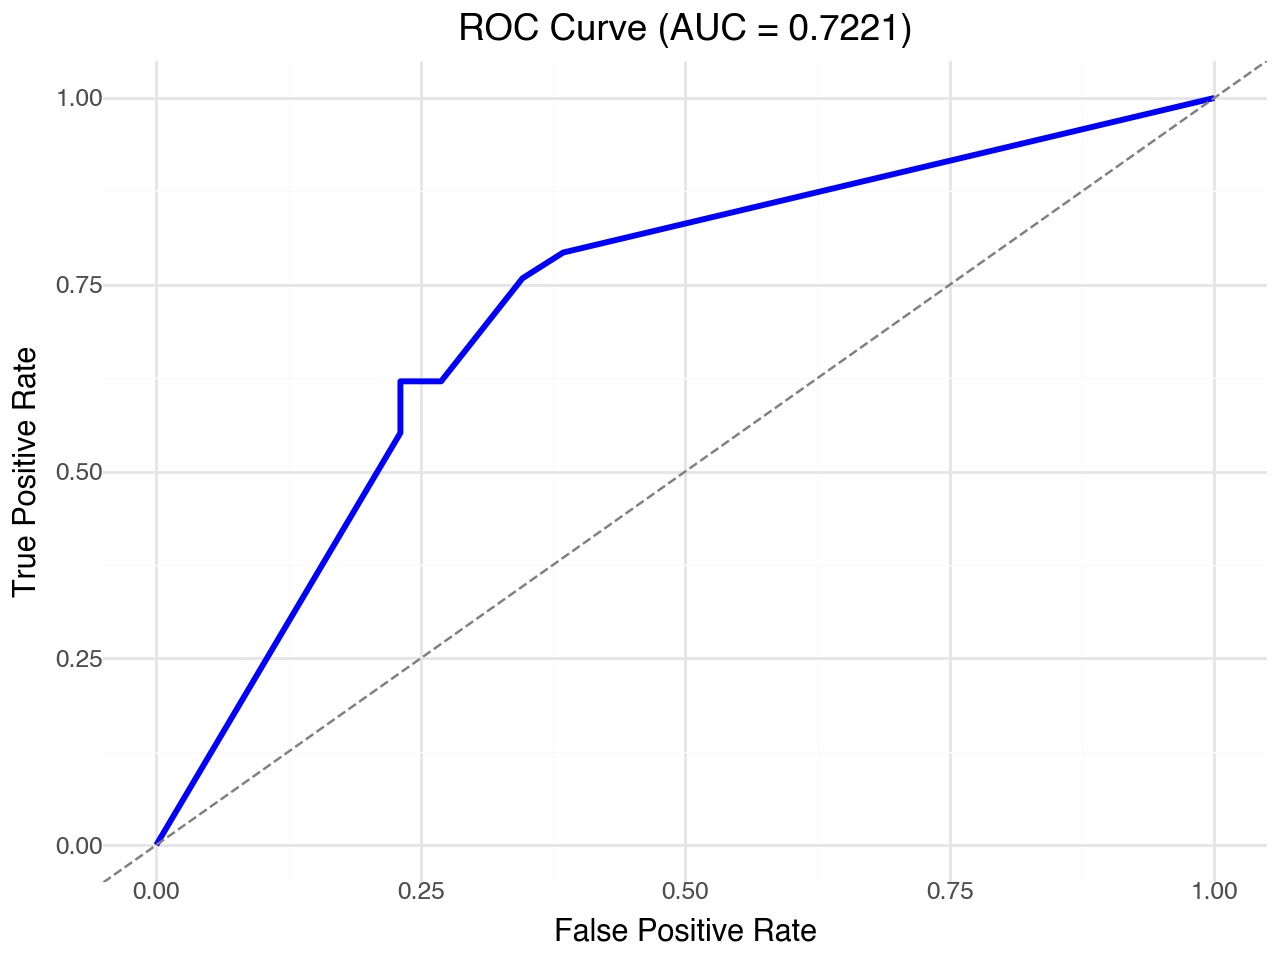

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


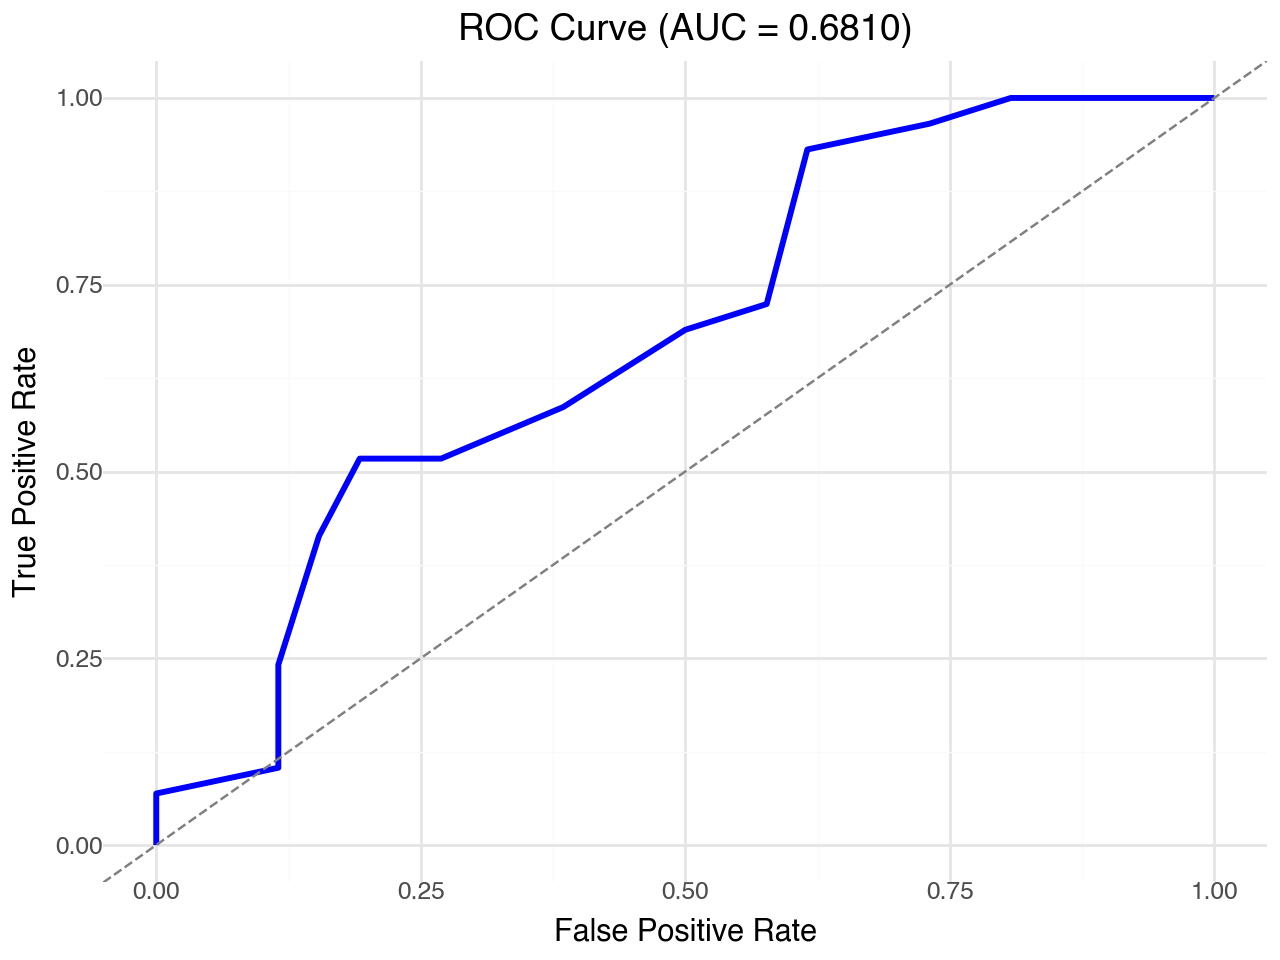

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


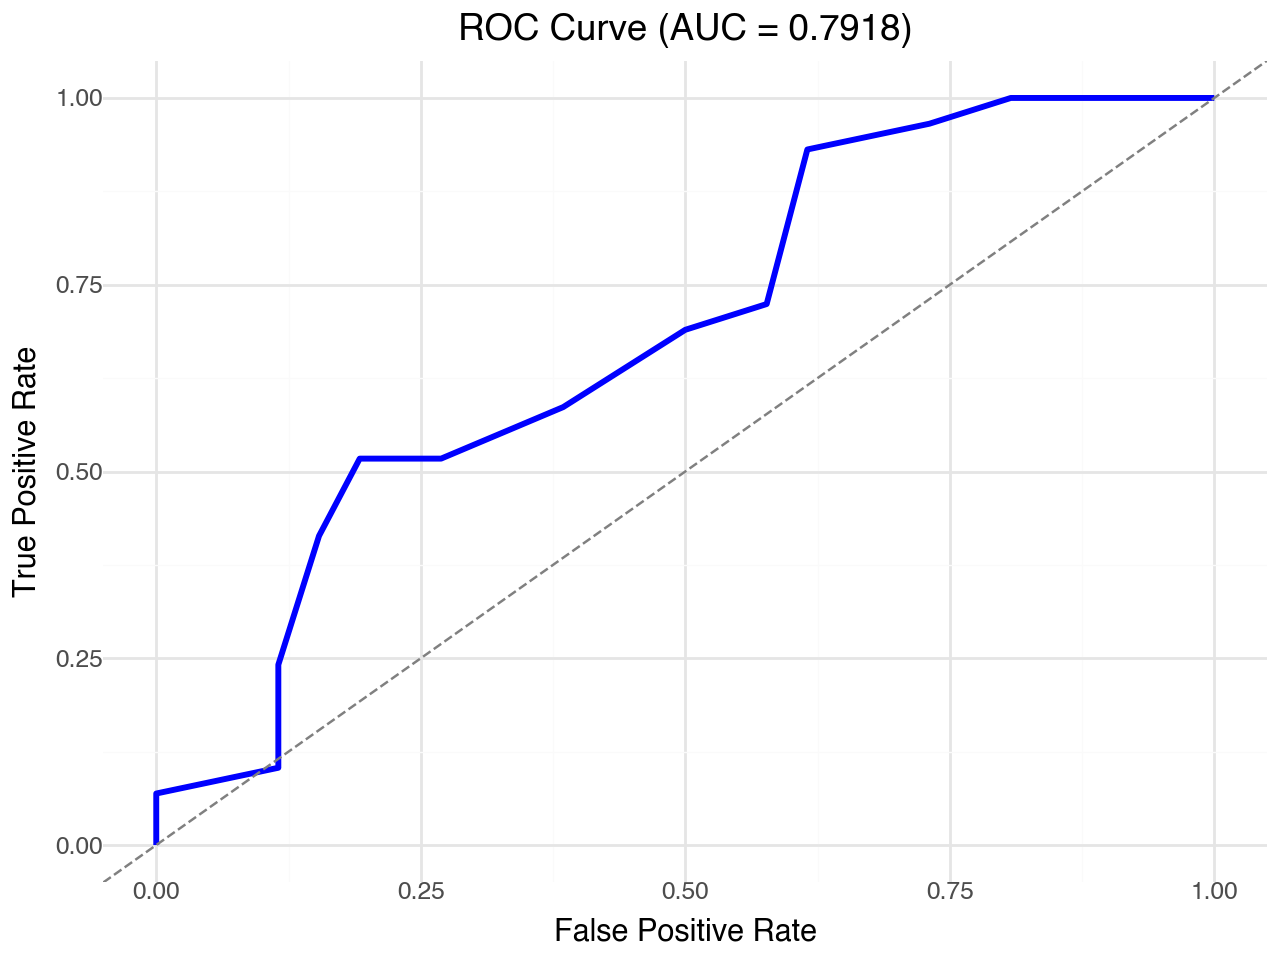

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


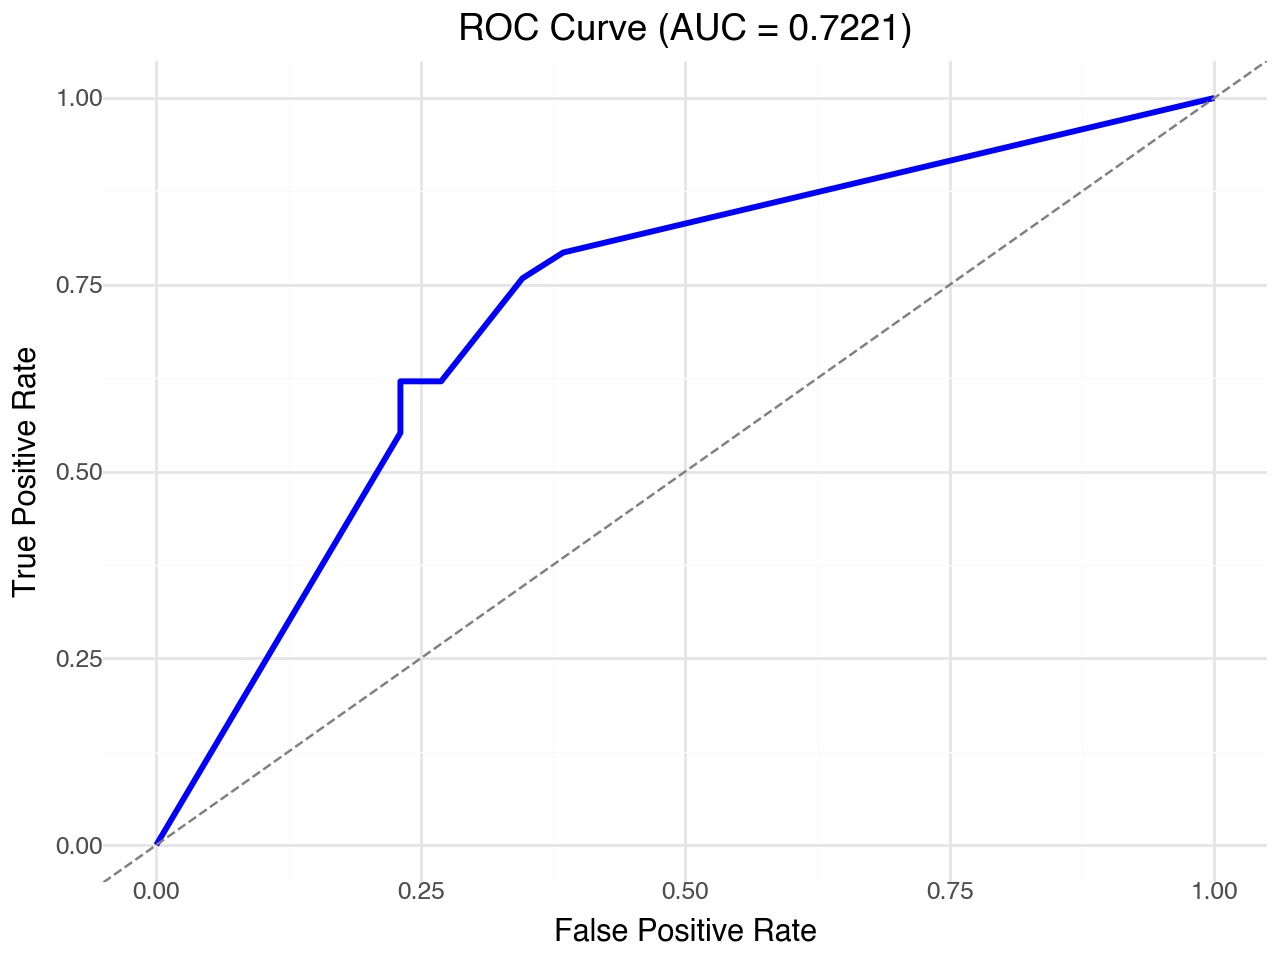

In [19]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
decision_tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(decision_tree, param_grid, scoring='roc_auc', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated ROC AUC: {grid_search.best_score_:.4f}")

# Step 3: Fit the final model
best_tree.fit(X_train, y_train)

# Step 4: Evaluate the model on the test set
y_pred = best_tree.predict(X_test)
y_pred_prob = best_tree.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Test ROC AUC: {test_roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Interpretation
print("\nInterpretation:")
print(f"The decision tree model used max_depth={grid_search.best_params_['max_depth']}, "
      f"min_samples_split={grid_search.best_params_['min_samples_split']}, "
      f"and min_samples_leaf={grid_search.best_params_['min_samples_leaf']}.")

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Create a DataFrame for plotting
roc_df3 = pd.DataFrame({
    'FPR': fpr,
    'TPR': tpr
})

roc_plot3 = (
    ggplot(roc_df3, aes(x='FPR', y='TPR')) +
    geom_line(color='blue', size=1.2) +
    geom_abline(intercept=0, slope=1, linetype='dashed', color='gray') +  # Diagonal reference line
    labs(
        title=f"ROC Curve (AUC = {roc_auc:.4f})",
        x="False Positive Rate",
        y="True Positive Rate"
    ) +
    theme_minimal()
)

print(roc_plot3)